### **TOXIC COMMENTS CLASSIFICATION** <br>

Dataset Source: https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/data <br>
Dataset uploaded on Google Drive: https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/data

In [1]:
# connecting google-drive to colab - to access the files in drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# updating the working directory
%cd /content/drive/Shareddrives/Project/Data

/content/drive/Shareddrives/Project/Data


In [3]:
# To enable code to display multiple output from single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

Import all the libraries required for text pre-processing, visualizations, data analysis and developing machine learning models

In [4]:
# import necessary libraries
# python libraries - for data manipulation
import pandas as pd
import numpy as np
import os
import string
from string import punctuation
from collections import Counter
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# natural language processing libraries - for NLP tasks: text pre-processing
import nltk
from nltk import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

***Pre-processing***

In [6]:
# Read data from the train.csv file
df_train = pd.read_csv('/content/drive/Shareddrives/Project/Data/train.csv')

In [7]:
# check a sample of training data
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


From the sample: <br>
The comments data is given in comments_text column with its associated unique comment id in different column. The toxicity level in the comments are categorized into 6 classes: toxic, severe_toxic, obscene, threat, insult and identity_hate.



In [8]:
df_train.shape

(159571, 8)

In [10]:
# Read data from the test.csv file
df_test = pd.read_csv('/content/drive/Shareddrives/Project/Data/test.csv')

In [11]:
# Add toxicity level columns and fill them with zeroes
column_names = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
for col_name in column_names:
    df_test[col_name] = 0
df_test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,0,0,0,0,0,0
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0,0,0,0,0,0
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0,0,0,0,0,0
3,00017563c3f7919a,":If you have a look back at the source, the in...",0,0,0,0,0,0
4,00017695ad8997eb,I don't anonymously edit articles at all.,0,0,0,0,0,0


Result: The test.csv file contains only id and comment_text columns. Hence, the other columns are added and assigned 0 value.

---



To make the data consistent, the following text mining techniques are being used: dropping null values(if any), removal of punctuations and stop-words, stemming.

In [12]:
# Drop any rows with missing values
df_train.dropna(subset=['comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'], inplace=True)
# Check the shape after dropping rows
print("Shape after dropping:", df_train.shape)

Shape after dropping: (159571, 8)


Result: No rows are dropped - indicates that there are no missing values in the training data

In [13]:
#remove punctuations from the text in comments
def punctuation(sentence):
  # convert every letter in the sentences which is not punctuation to lower alphabets - to maintain text consistency
    comment_text = [letters.lower() for letters in sentence if letters not in string.punctuation ]
  # join the words after elimination of punctuations
    comment_text = ''.join(comment_text)
    return comment_text

df_train['comment_text'] = df_train['comment_text'].apply(punctuation)
df_test['comment_text'] = df_test['comment_text'].apply(punctuation)
df_train['comment_text'].head()

0    explanation\nwhy the edits made under my usern...
1    daww he matches this background colour im seem...
2    hey man im really not trying to edit war its j...
3    \nmore\ni cant make any real suggestions on im...
4    you sir are my hero any chance you remember wh...
Name: comment_text, dtype: object

Result: the words in the sentences are converted to lower alphabets and all punctuations in the sentences are eliminated

In [14]:
#removing stopwords(insignificant words) from the comments_text
new_stopwords = nltk.corpus.stopwords.words('english')

def stopwords(sentence):
    comment_text = [words for words in sentence.split() if words not in new_stopwords]
    comment_text = ' '.join(comment_text)
    return comment_text

df_train['comment_text'] = df_train['comment_text'].apply(stopwords)
df_test['comment_text'] = df_test['comment_text'].apply(stopwords)
df_train['comment_text'].head()

0    explanation edits made username hardcore metal...
1    daww matches background colour im seemingly st...
2    hey man im really trying edit war guy constant...
3    cant make real suggestions improvement wondere...
4                  sir hero chance remember page thats
Name: comment_text, dtype: object

Result: The words which are repeated and not adding any weight/value to the determination of toxicity level are removed.

In [15]:
#stemming: reducing the words to their root words
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer(language='english')
df_train['comment_text'] = df_train['comment_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df_test['comment_text'] = df_test['comment_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df_train['comment_text'].head()

0    explan edit made usernam hardcor metallica fan...
1    daww match background colour im seem stuck tha...
2    hey man im realli tri edit war guy constant re...
3    cant make real suggest improv wonder section s...
4                      sir hero chanc rememb page that
Name: comment_text, dtype: object

Result: stemming is performed on each word in a sentence and is converted to its base word. <br>
Note: SnowballStemmer supports other languages as well. However, since most of the text in comments is in english, the same is given as hyper-paramater for the function.

***Exploratory Data Analysis***

Exploring training data to understand basic insights

In [16]:
# comment_text - input
# text_labels - output
X = df_train['comment_text']
y = df_train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

In [17]:
# Find number of unique words in overall training data
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
158501


Result: Out of 159k rows(appx.) of comments, there are only 158,501 unique words

In [18]:
# Find avergae comment length
print("Comment length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

Comment length: 
Mean 224.87 words (351.884460)


Result: Each comment in the given training data seems to contain ~225 words in a sentence

                        word  count
0   (nigger, nigger, nigger)   2010
1         (fuck, fuck, fuck)   1694
2            (hi, moron, hi)   1468
3         (moron, hi, moron)   1466
4  (criteria, speedi, delet)   1437


<Axes: xlabel='count', ylabel='word'>

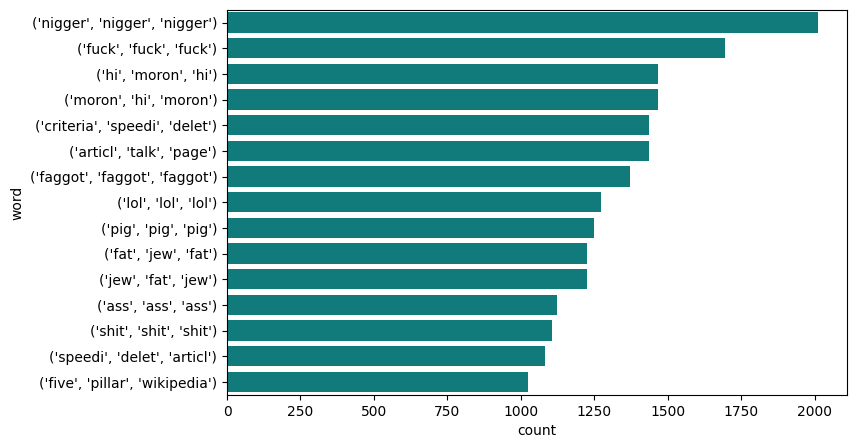

In [19]:
# n-gram analysis: to check most repeated combination of words

# Join all the comments/rows as one string
texts = ' '.join(df_train['comment_text'])
string = texts.split(" ")

def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (8,5))
    return sns.barplot(x='count',y='word', data=n_gram_df,color ='darkcyan', )
draw_n_gram(string,3) # 3 words together


***Modeling***

The implementation of the XGBoost Decision Tree Classifier model was considered because of its advantages associated with the Gradient Boosting technique and its ability to handle multi-classes (multiple labels in this case).

Split the training data into training and validation sets, perform TF-IDF vectorization on training, validation and test data sets. <br>
Since there are multiple labels, create an Xgboost model for each individual label with hyperparameter set as 'logistic' to get the probability of comment_text belonging to that particular label. <br>
After training the models, perform prediction on validation set and save the result.

In [20]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Considering input and output DataFrames of training data
X = df_train['comment_text']
y = df_train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

# Considering input and output DataFrames of test data
X_test = df_test["comment_text"]
y_test = df_test[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF vectorizer and fit on data
vectorizer = TfidfVectorizer()
# on training data set
X_train_tfidf = vectorizer.fit_transform(X_train)
# on validation data set
X_val_tfidf = vectorizer.transform(X_val)
# on test data set
X_test_tfidf = vectorizer.transform(X_test)

# Create separate XGBoost models for each individual label
models = []
for label in y.columns:
    # Create DMatrix for XGBoost
    data_train = xgb.DMatrix(X_train_tfidf, label=y_train[label].values)
    data_val = xgb.DMatrix(X_val_tfidf, label=y_val[label].values)
    data_test = xgb.DMatrix(X_test_tfidf, label=y_test[label].values)

    # Set XGBoost parameters
    parameters = {'objective': 'binary:logistic', 'eval_metric': 'logloss'}
    num_rounds = 10

    # Train the XGBoost model
    xgb_model = xgb.train(parameters, data_train, num_rounds)
    models.append(xgb_model)

# Make predictions on the validation data
val_predictions = []
for model in models:
    preds_val = model.predict(data_val)
    val_predictions.append(preds_val)

 Convert predictions of validation set to binary values (0 or 1) based on a threshold(0.5).

In [21]:
# Convert predictions to binary values (0 or 1) based on a threshold
threshold = 0.5
binary_predictions = [[1 if p >= threshold else 0 for p in preds] for preds in val_predictions]

Prepare a DataFrame to store the predictions with corresponding IDs and comment_text. Add the predictions of each label to the dataframe. Sort the dataframe in the increasing order of index values

In [22]:
# Prepare a DataFrame to store the predictions with corresponding IDs and comment text
val_predictions_df = pd.DataFrame()
val_predictions_df['index'] = X_val.index
df_train['index'] = df_train.index
val_predictions_df['vectorized_comment'] = X_val.values

# Add the predictions for each label to the DataFrame
for i, label in enumerate(y.columns):
    val_predictions_df[label] = binary_predictions[i]

val_predictions_df_sorted = val_predictions_df.sort_values(by='index')
val_predictions_df_sorted

,index,vectorized_comment,toxic,severe_toxic,obscene,threat,insult,identity_hate
18567,0,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0
26836,4,sir hero chanc rememb page that,0,0,0,0,0,0
31634,12,hey talk exclus group wp talibanswho good dest...,0,0,0,0,0,0
4150,20,regard recent edit pleas read wpfilmplot edit ...,0,0,0,0,0,0
10201,24,reconsid 1st paragraph edit dont understand re...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
3887,159560,edit articl without consensus remov cite conte...,0,0,0,0,0,0
1010,159561,read would thought everyon could recit heart s...,0,0,0,0,0,0
30000,159564,catalan independent social movement involv peo...,0,0,0,0,0,0
28936,159568,spitzer umm there actual articl prostitut ring...,0,0,0,0,0,0


Extracting the values of comment_text and id from the original training data for comparison

In [23]:
val_df_filtered = df_train.loc[df_train['index'].isin(val_predictions_df_sorted['index'])]
val_df_filtered

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,index
0,0000997932d777bf,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chanc rememb page that,0,0,0,0,0,0,4
12,0005c987bdfc9d4b,hey talk exclus group wp talibanswho good dest...,1,0,0,0,0,0,12
20,000b08c464718505,regard recent edit pleas read wpfilmplot edit ...,0,0,0,0,0,0,20
24,000cfee90f50d471,reconsid 1st paragraph edit dont understand re...,0,0,0,0,0,0,24
...,...,...,...,...,...,...,...,...,...
159560,ffcdcb71854f6d8a,edit articl without consensus remov cite conte...,0,0,0,0,0,0,159560
159561,ffd2e85b07b3c7e4,read would thought everyon could recit heart s...,0,0,0,0,0,0,159561
159564,ffe897e7f7182c90,catalan independent social movement involv peo...,0,0,0,0,0,0,159564
159568,ffee36eab5c267c9,spitzer umm there actual articl prostitut ring...,0,0,0,0,0,0,159568


Calculate the evaluation metrics: accuracy, precision, recall, f1_score for each label

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the list of column names
columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# Initialize empty dictionaries to store the evaluation metrics
accuracy_dict = {}
precision_dict = {}
recall_dict = {}
f1_dict = {}

# Iterate over each column
for column in columns:
    # Obtain the true labels and predicted labels for the specific column from the two data frames
    true_labels = val_df_filtered[column]
    predicted_labels = val_predictions_df_sorted[column]

    # Calculate the evaluation metrics
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    # Store the evaluation metrics in the respective dictionaries
    accuracy_dict[column] = accuracy
    precision_dict[column] = precision
    recall_dict[column] = recall
    f1_dict[column] = f1

# Print the evaluation metrics
for column in columns:
    print("Class:", column)
    print("Accuracy:", accuracy_dict[column])
    print("Precision:", precision_dict[column])
    print("Recall:", recall_dict[column])
    print("F1 Score:", f1_dict[column])
    print()


Class: toxic
Accuracy: 0.9421588594704684
Precision: 0.9340028694404591
Recall: 0.4260471204188482
F1 Score: 0.5851685393258427

Class: severe_toxic
Accuracy: 0.989942033526555
Precision: 0.5
Recall: 0.10903426791277258
F1 Score: 0.17902813299232737

Class: obscene
Accuracy: 0.974745417515275
Precision: 0.8816120906801007
Recall: 0.6122448979591837
F1 Score: 0.7226428079834826

Class: threat
Accuracy: 0.9975560081466395
Precision: 0.35714285714285715
Recall: 0.06756756756756757
F1 Score: 0.11363636363636363

Class: insult
Accuracy: 0.9639667867773775
Precision: 0.7654462242562929
Recall: 0.4144981412639405
F1 Score: 0.5377813504823151

Class: identity_hate
Accuracy: 0.991540028199906
Precision: 0.6764705882352942
Recall: 0.1564625850340136
F1 Score: 0.2541436464088398



Visualizing the values of evaluation metrics

<Figure size 1000x600 with 0 Axes>

<Axes: >

<BarContainer object of 6 artists>

([<matplotlib.axis.XTick at 0x7b3e50524fd0>,
 [Text(0, 0, 'toxic'),
  Text(1, 0, 'severe_toxic'),
  Text(2, 0, 'obscene'),
  Text(3, 0, 'threat'),
  Text(4, 0, 'insult'),
  Text(5, 0, 'identity_hate')])

Text(0.5, 1.0, 'Accuracy')

<Axes: >

<BarContainer object of 6 artists>

([<matplotlib.axis.XTick at 0x7b3e505bc790>,
 [Text(0, 0, 'toxic'),
  Text(1, 0, 'severe_toxic'),
  Text(2, 0, 'obscene'),
  Text(3, 0, 'threat'),
  Text(4, 0, 'insult'),
  Text(5, 0, 'identity_hate')])

Text(0.5, 1.0, 'Precision')

<Axes: >

<BarContainer object of 6 artists>

([<matplotlib.axis.XTick at 0x7b3e4e988280>,
 [Text(0, 0, 'toxic'),
  Text(1, 0, 'severe_toxic'),
  Text(2, 0, 'obscene'),
  Text(3, 0, 'threat'),
  Text(4, 0, 'insult'),
  Text(5, 0, 'identity_hate')])

Text(0.5, 1.0, 'Recall')

<Axes: >

<BarContainer object of 6 artists>

([<matplotlib.axis.XTick at 0x7b3e4e9d2740>,
 [Text(0, 0, 'toxic'),
  Text(1, 0, 'severe_toxic'),
  Text(2, 0, 'obscene'),
  Text(3, 0, 'threat'),
  Text(4, 0, 'insult'),
  Text(5, 0, 'identity_hate')])

Text(0.5, 1.0, 'F1 Score')

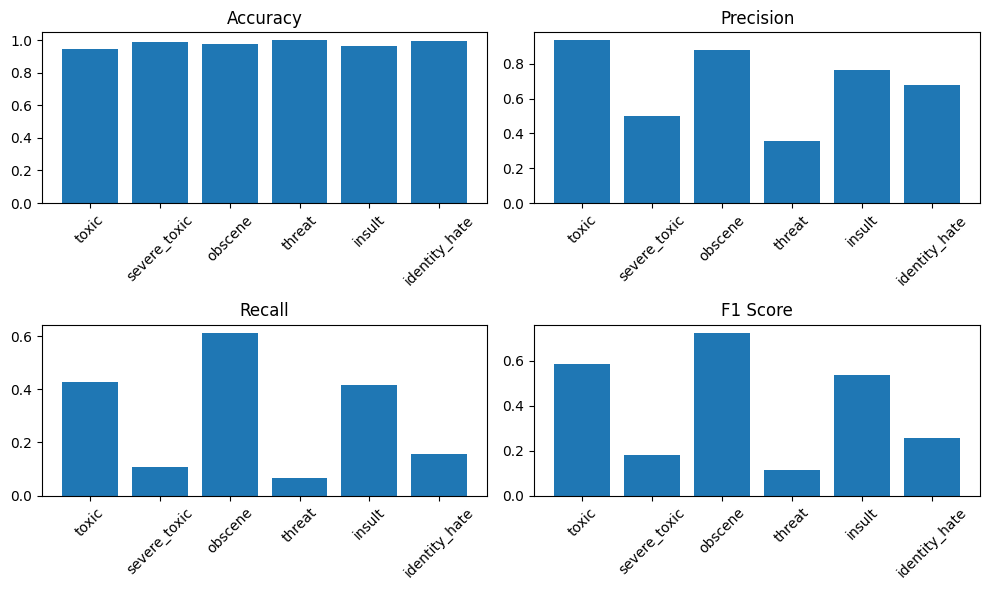

In [25]:
import matplotlib.pyplot as plt

# Create lists to store the metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Append the metrics to the respective lists
for column in columns:
    accuracy_list.append(accuracy_dict[column])
    precision_list.append(precision_dict[column])
    recall_list.append(recall_dict[column])
    f1_list.append(f1_dict[column])

# Plot the metrics
plt.figure(figsize=(10, 6))

# Set the x-axis values as the class names
x = range(len(columns))

# Plot accuracy
plt.subplot(221)
plt.bar(x, accuracy_list)
plt.xticks(x, columns, rotation=45)
plt.title('Accuracy')

# Plot precision
plt.subplot(222)
plt.bar(x, precision_list)
plt.xticks(x, columns, rotation=45)
plt.title('Precision')

# Plot recall
plt.subplot(223)
plt.bar(x, recall_list)
plt.xticks(x, columns, rotation=45)
plt.title('Recall')

# Plot F1 score
plt.subplot(224)
plt.bar(x, f1_list)
plt.xticks(x, columns, rotation=45)
plt.title('F1 Score')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Show the plot
plt.show()


From the plots, it can be clearly observed that the accuracy values are good. So, we can proceed with predicting the toxicity level values for the comment_text on test data

In [26]:
# Make predictions on the test data
test_predictions = []
for model in models:
    preds_test = model.predict(data_test)
    test_predictions.append(preds_test)

Prepare a DataFrame to store the predictions with corresponding IDs and comment text.

In [27]:
# Prepare a DataFrame to store the predictions with corresponding IDs and comment text
test_predictions_df = pd.DataFrame()
test_predictions_df['vectorized_comment'] = X_test.values

# Add the predictions for each label to the DataFrame
for i, label in enumerate(y.columns):
    test_predictions_df[label] = test_predictions[i]

test_predictions_df
# Convert DataFrame to CSV
test_predictions_df.to_csv('test_predictions.csv', index=False)

,vectorized_comment,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,yo bitch ja rule succes youll ever what hate s...,0.919355,0.067099,0.907446,0.008731,0.889779,0.010550
1,rfc titl fine imo,0.070838,0.007765,0.024990,0.006678,0.032034,0.008648
2,sourc zaw ashton lapland —,0.070838,0.007765,0.024990,0.006678,0.032034,0.008648
3,look back sourc inform updat correct form gues...,0.046140,0.007765,0.024990,0.006678,0.025102,0.008648
4,dont anonym edit articl,0.042331,0.007765,0.017564,0.006678,0.016518,0.008648
...,...,...,...,...,...,...,...
153159,total agre stuff noth toolongcrap,0.070838,0.007765,0.024990,0.006678,0.032034,0.008648
153160,throw field home plate get faster throw cut ma...,0.070838,0.007765,0.024990,0.006678,0.032034,0.008648
153161,okinotorishima categori see chang agre correct...,0.070838,0.007765,0.024990,0.006678,0.032034,0.008648
153162,one found nation eu germani law return quit si...,0.070838,0.007765,0.024990,0.006678,0.032034,0.013481
